In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

sns.set_theme(style="whitegrid")

# Carregamento de todos os *datasets* utilizados

In [3]:
results_df = pd.read_csv("data/formula-1/results.csv")
races_df = pd.read_csv("data/formula-1/races.csv")
drivers_df = pd.read_csv("data/formula-1/drivers.csv")
seasons_df = pd.read_csv("data/formula-1/seasons.csv")
lap_times_df = pd.read_csv("data/formula-1/lap_times.csv")
constructors_df = pd.read_csv("data/formula-1/constructors.csv")
constructor_results_df = pd.read_csv("data/formula-1/constructor_results.csv")
constructor_standings_df = pd.read_csv("data/formula-1/constructor_standings.csv")
rr_df = pd.merge(results_df, races_df, on="raceId")
rrd = pd.merge(rr_df, drivers_df, on="driverId")

In [4]:
# Pilotos com mais pontos ao longo do tempo
# precisarei contabilizar as vitórias e aplicar a pontuação atual para ficar justo

In [5]:
rrd.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'date', 'time_y', 'url_x', 'driverRef', 'number_y', 'code', 'forename',
       'surname', 'dob', 'nationality', 'url_y'],
      dtype='object')

In [6]:
rrd["position"].unique()

array(['1', '5', '13', '3', '2', '\\N', '10', '7', '12', '9', '4', '6',
       '16', '18', '14', '8', '19', '15', '17', '11', '23', '20', '21',
       '22', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33'],
      dtype=object)

In [7]:
rrd["grid"] = rrd["grid"].replace("\\N", "0")
rrd["position"] = rrd["position"].replace("\\N", "0")


In [8]:
rrd["delta_pos"] = rrd["grid"].astype("int64") - rrd["position"].astype("int64")
rrd[["name", "year", "forename", "surname", "grid", "position", "delta_pos"]]

,name,year,forename,surname,grid,position,delta_pos
0,Australian Grand Prix,2008,Lewis,Hamilton,1,1,0
1,Malaysian Grand Prix,2008,Lewis,Hamilton,9,5,4
2,Bahrain Grand Prix,2008,Lewis,Hamilton,3,13,-10
3,Spanish Grand Prix,2008,Lewis,Hamilton,5,3,2
4,Turkish Grand Prix,2008,Lewis,Hamilton,3,2,1
...,...,...,...,...,...,...,...
25135,Monaco Grand Prix,2021,Nikita,Mazepin,19,17,2
25136,Azerbaijan Grand Prix,2021,Nikita,Mazepin,18,14,4
25137,French Grand Prix,2021,Nikita,Mazepin,18,20,-2
25138,Styrian Grand Prix,2021,Nikita,Mazepin,20,18,2


In [9]:
rrd_2020 = rrd[rrd["year"] == 2020]
rrd_2020[["name", "year", "forename", "surname", "grid", "position", "delta_pos"]]

,name,year,forename,surname,grid,position,delta_pos
247,Austrian Grand Prix,2020,Lewis,Hamilton,5,4,1
251,Styrian Grand Prix,2020,Lewis,Hamilton,1,1,0
252,Hungarian Grand Prix,2020,Lewis,Hamilton,1,1,0
253,British Grand Prix,2020,Lewis,Hamilton,1,1,0
254,70th Anniversary Grand Prix,2020,Lewis,Hamilton,2,2,0
...,...,...,...,...,...,...,...
25099,Sakhir Grand Prix,2020,Nicholas,Latifi,16,0,16
25100,Abu Dhabi Grand Prix,2020,Nicholas,Latifi,18,17,1
25110,Sakhir Grand Prix,2020,Jack,Aitken,17,16,1
25111,Sakhir Grand Prix,2020,Pietro,Fittipaldi,20,17,3


In [10]:
rrd.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'date', 'time_y', 'url_x', 'driverRef', 'number_y', 'code', 'forename',
       'surname', 'dob', 'nationality', 'url_y', 'delta_pos'],
      dtype='object')

In [11]:
rrd.groupby(["nationality"]).count()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,time_y,url_x,driverRef,number_y,code,forename,surname,dob,url_y,delta_pos
nationality,,,,,,,,,,,,,,,,,,,,,
American,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,...,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279
American-Italian,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Argentine,373,373,373,373,373,373,373,373,373,373,...,373,373,373,373,373,373,373,373,373,373
Argentine-Italian,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Australian,786,786,786,786,786,786,786,786,786,786,...,786,786,786,786,786,786,786,786,786,786
Austrian,690,690,690,690,690,690,690,690,690,690,...,690,690,690,690,690,690,690,690,690,690
Belgian,591,591,591,591,591,591,591,591,591,591,...,591,591,591,591,591,591,591,591,591,591
Brazilian,1953,1953,1953,1953,1953,1953,1953,1953,1953,1953,...,1953,1953,1953,1953,1953,1953,1953,1953,1953,1953
British,4313,4313,4313,4313,4313,4313,4313,4313,4313,4313,...,4313,4313,4313,4313,4313,4313,4313,4313,4313,4313


In [12]:
races_in_2020 = races_df[races_df["year"] == 2020]

In [13]:
data = rrd[["year", "driverId", "points"]]\
    .groupby(["year", "driverId"])\
    .sum()\
    .sort_values(["points"], ascending=False)
data = data.reset_index()
# data[(data["year"] == 2019) & (data["points"] == data["points"].max())]
# data_by_year = data[data["year"] == 2015]
# data_by_year
# years_champion = data_by_year[data_by_year["points"] == data_by_year["points"].max()]
# years_champion
# data_by_year[data_by_year["points"] == data_by_year["points"].max()]

In [14]:
list(range(2010, 2021))

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [15]:
champions = []
second_places = []
third_places = []
for year in range(1950, 2021):
    data_by_year = data[data["year"] == year]
    
    first_three = data_by_year.iloc[0:3]
    
    years_champion = data_by_year[data_by_year["points"] == data_by_year["points"].max()]
    years_champion_2 = first_three

    # champions_array.append(years_champion)
    champions.append(first_three.iloc[0])
    second_places.append(first_three.iloc[1])
    third_places.append(first_three.iloc[2])
    
temp_champions_df = pd.DataFrame(champions, columns = ["year", "driverId", "points"])
temp_second_places_df = pd.DataFrame(second_places, columns = ["year", "driverId", "points"])
temp_third_places_df = pd.DataFrame(third_places, columns = ["year", "driverId", "points"])

champions_df = pd.merge(temp_champions_df, drivers_df, on="driverId")
second_places_df = pd.merge(temp_second_places_df, drivers_df, on="driverId")
third_places_df = pd.merge(temp_third_places_df, drivers_df, on="driverId")

champions_df[["year", "driverId"]] = champions_df[["year", "driverId"]].astype(int)
second_places_df[["year", "driverId"]] = second_places_df[["year", "driverId"]].astype(int)
third_places_df[["year", "driverId"]] = third_places_df[["year", "driverId"]].astype(int)

In [16]:
champions_by_nationality = champions_df.groupby(["nationality"]).count()
# champions_by_nationality
second_places_by_nationality = second_places_df.groupby(["nationality"]).count()
third_places_by_nationality = third_places_df.groupby(["nationality"]).count()

In [17]:
gold = "#D4AF37"
silver = "#C0C0C0"
bronze = "#aa733d"

# O domínio do Reino Unido ao longo dos anos
Nota-se claramente o domínio britânico na competição. O que não é surpreendente dada a origem da Fórmula 1

PS: Há um erro nestes dados pois em 1988 as regras foram alteradas e o título não foi para o piloto que fez mais pontos no geral, mas sim para o piloto que fez mais pontos nas corridas elegíveis. Dessa forma em 1988 o campeão foi Ayrton Senna (Brasil) e não Allain Prost (França)

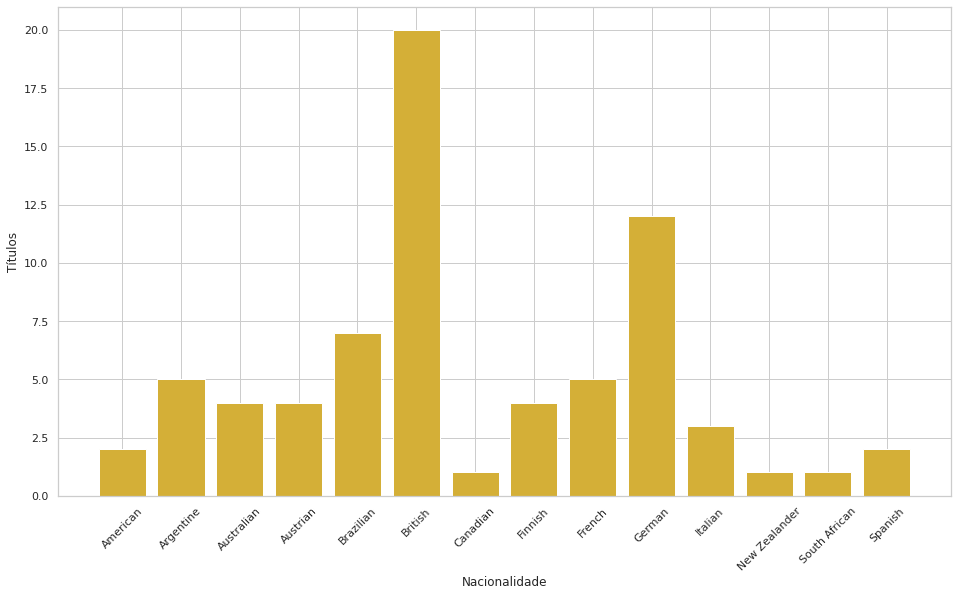

In [18]:
labels = champions_by_nationality.index
height = champions_by_nationality["year"]

plt.figure(figsize=(16, 9))
plt.bar(labels, height, color = gold)
plt.ylabel("Títulos")
plt.xlabel("Nacionalidade")
plt.xticks(rotation=45)
plt.show()

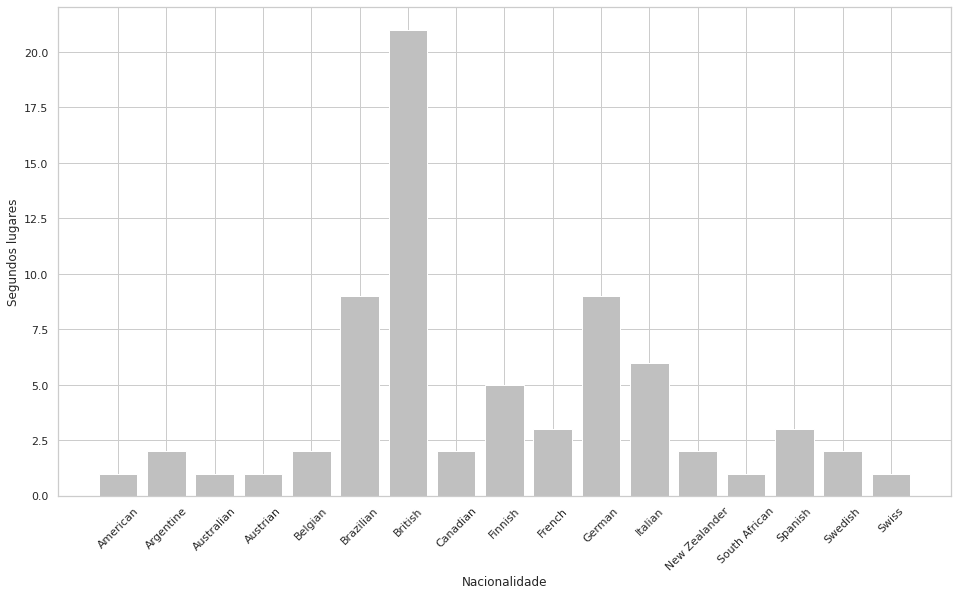

In [19]:
labels = second_places_by_nationality.index
height = second_places_by_nationality["year"]

plt.figure(figsize=(16, 9))
plt.bar(labels, height, color = silver)
plt.ylabel("Segundos lugares")
plt.xlabel("Nacionalidade")
plt.xticks(rotation=45)
plt.show()

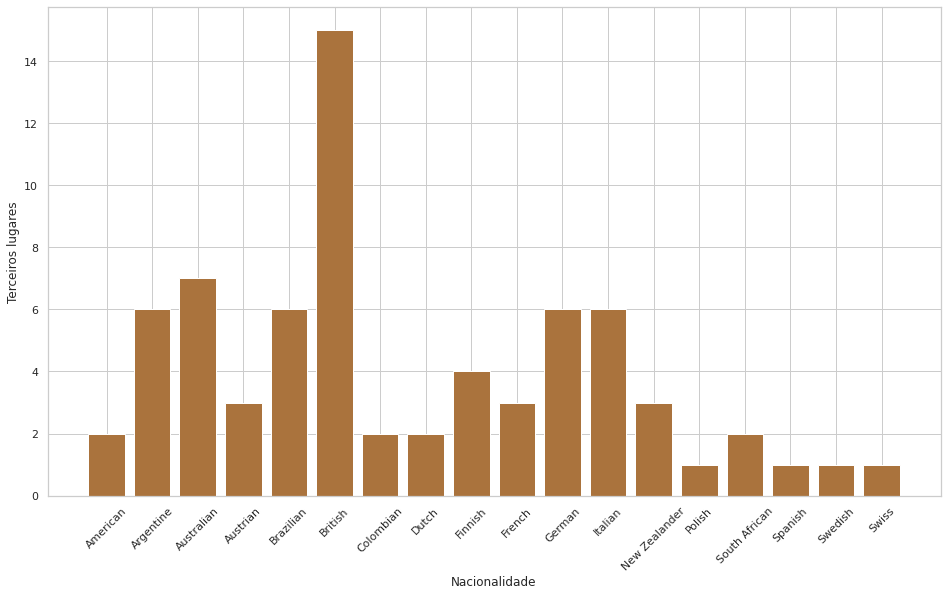

In [20]:
#b08d57
labels = third_places_by_nationality.index
height = third_places_by_nationality["year"]

plt.figure(figsize=(16, 9))
plt.bar(labels, height, color = bronze)
plt.ylabel("Terceiros lugares")
plt.xlabel("Nacionalidade")
plt.xticks(rotation=45)
plt.show()

### Obtenção dos primeiros, segundos e terceiros lugares
Processo os dados criando 4 arrays, contendo as nacionalidades, primeiros, segundos e terceiros lugares, respectivamente. 
A coluna `year` foi escolhida aleatóriamente. Como o dataframe agrupado traz todas as colunas originais, bastava uma coluna qualquer para obter o valor desejado 

In [21]:
champions_by_nationality.index.values

all_nationalities = set()

for v in champions_by_nationality.index.values:
    all_nationalities.add(v)
for v in second_places_by_nationality.index.values:
    all_nationalities.add(v)
for v in third_places_by_nationality.index.values:
    all_nationalities.add(v)    

nationalities = sorted(list(all_nationalities))
firsts = []
seconds = []
thirds = []

for n in nationalities:
    value = None
    try:
        value = champions_by_nationality.loc[n]["year"]
    except KeyError as e:
        value = 0
    firsts.append(value)
    
    value = None
    try:
        value = second_places_by_nationality.loc[n]["year"]
    except KeyError as e:
        value = 0
    seconds.append(value)
    
    value = None
    try:
        value = third_places_by_nationality.loc[n]["year"]
    except KeyError as e:
        value = 0
    thirds.append(value)    

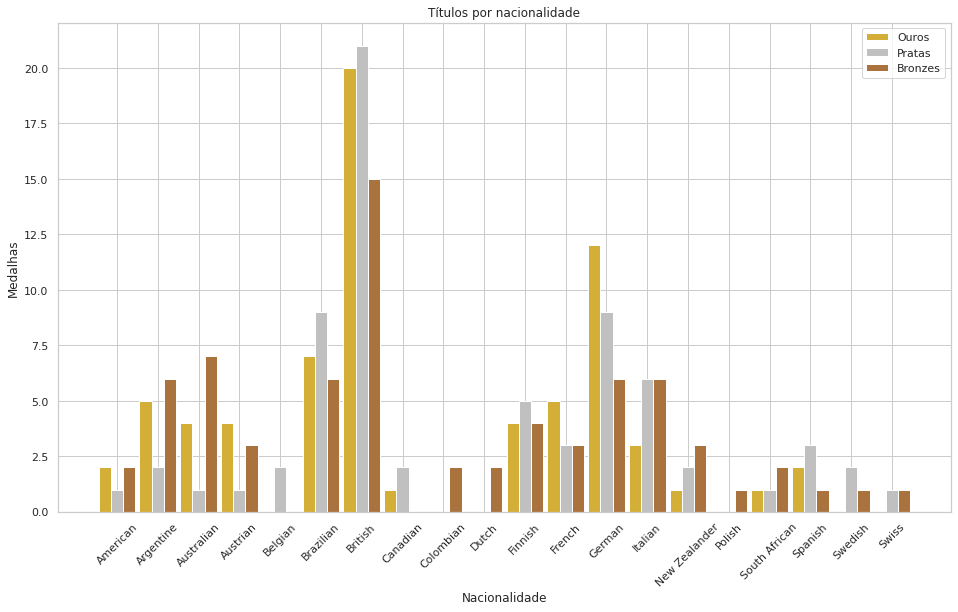

In [22]:
ind = np.arange(len(nationalities))
width = 0.3

# print(ind)
# print(ind + width)
# print(ind + width * 2)

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(111)

first_rects = ax.bar(ind, firsts, width, color = gold)
second_rects = ax.bar(ind + width, seconds, width, color = silver)
third_rects = ax.bar(ind + (width * 2), thirds, width, color = bronze)

ax.set_xticks(ind + width)
ax.set_xticklabels(tuple(nationalities))
ax.legend((first_rects, second_rects, third_rects), ("Ouros", "Pratas", "Bronzes"))

plt.ylabel("Medalhas")
plt.xlabel("Nacionalidade")
plt.title("Títulos por nacionalidade")
plt.xticks(rotation=45)
plt.show()

### Evolução dos tempos das voltas no GP do Brasil ao longo dos anos
Voltas rápidas

In [23]:
races_df[races_df["name"] == "Brazilian Grand Prix"]


,raceId,year,round,circuitId,name,date,time,url
15,16,2009,16,18,Brazilian Grand Prix,2009-10-18,16:00:00,http://en.wikipedia.org/wiki/2009_Brazilian_Gr...
34,35,2008,18,18,Brazilian Grand Prix,2008-11-02,17:00:00,http://en.wikipedia.org/wiki/2008_Brazilian_Gr...
51,52,2007,17,18,Brazilian Grand Prix,2007-10-21,16:00:00,http://en.wikipedia.org/wiki/2007_Brazilian_Gr...
69,70,2006,18,18,Brazilian Grand Prix,2006-10-22,14:00:00,http://en.wikipedia.org/wiki/2006_Brazilian_Gr...
86,87,2005,17,18,Brazilian Grand Prix,2005-09-25,14:00:00,http://en.wikipedia.org/wiki/2005_Brazilian_Gr...
106,107,2004,18,18,Brazilian Grand Prix,2004-10-24,\N,http://en.wikipedia.org/wiki/2004_Brazilian_Gr...
109,110,2003,3,18,Brazilian Grand Prix,2003-04-06,\N,http://en.wikipedia.org/wiki/2003_Brazilian_Gr...
125,126,2002,3,18,Brazilian Grand Prix,2002-03-31,\N,http://en.wikipedia.org/wiki/2002_Brazilian_Gr...
142,143,2001,3,18,Brazilian Grand Prix,2001-04-01,\N,http://en.wikipedia.org/wiki/2001_Brazilian_Gr...
158,159,2000,2,18,Brazilian Grand Prix,2000-03-26,\N,http://en.wikipedia.org/wiki/2000_Brazilian_Gr...


In [24]:
# columns = ["position", "driverId", "name", "forename", "surname"]
# rrd[columns]
data
data_by_year = data[data["year"] == 2020]
first_three = data_by_year.iloc[0:3].values
first_three[1][2]

223.0

In [25]:
lap_times_per_race_df = lap_times_df.merge(races_df, on = "raceId")
lap_times_in_br = lap_times_per_race_df[lap_times_per_race_df["name"] == "Brazilian Grand Prix"]

columns = ["year", "time_x", "driverId"]
print(lap_times_in_br["time_x"].values)


['1:22.384' '1:18.240' '1:18.239' ... '2:07.480' '1:17.011' '1:14.320']


In [26]:
def to_ms(str_data):
    minutes = str_data.split(":")[0]
    seconds_and_millis = str_data.split(":")[1]
    seconds = seconds_and_millis.split(".")[0]
    millis = seconds_and_millis.split(".")[1]
    ms = (int(minutes) * 60000) + (int(seconds) * 1000) + int(millis)
    return ms

def formatted_ms(time_in_ms):
    minutes, msec = divmod(time_in_ms, 60000)
    sec, msec = divmod(msec, 1000)
    return '{minutes}:{sec}.{msec}'.format(minutes = str(minutes), sec = str(sec), msec = str(msec))

print(to_ms("1:22.384"))
print(formatted_ms(to_ms("1:22.384")))

82384
1:22.384


#### Converto os dados das voltas para milissegundos para fazer os calculos

In [27]:
lap_times_in_br_by_year = lap_times_in_br.groupby(["year"]).mean()
lap_times_in_br_by_year.index


Int64Index([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019],
           dtype='int64', name='year')

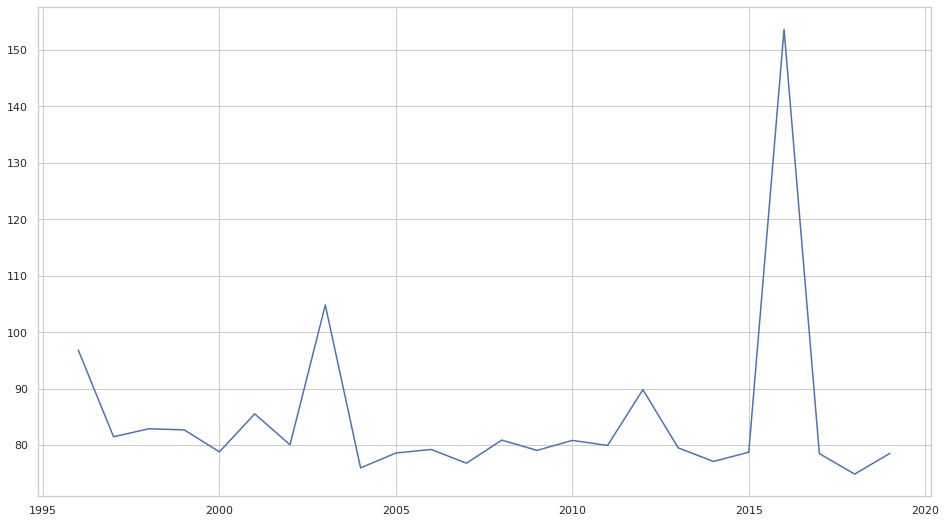

In [28]:
plt.figure(figsize=(16, 9))
x = lap_times_in_br_by_year.index
y = lap_times_in_br_by_year["milliseconds"] / 1000
plt.plot(x, y)
plt.show()

### Quantidade de corridas ao longo dos anos

In [29]:
races_per_year = races_df[["year", "raceId"]].groupby(["year"]).count()

In [30]:
races_per_year = races_per_year.reset_index()
# plt.figure(figsize=(16, 9))
# plt.bar(races_per_year["year"], races_per_year["raceId"])
# plt.show()

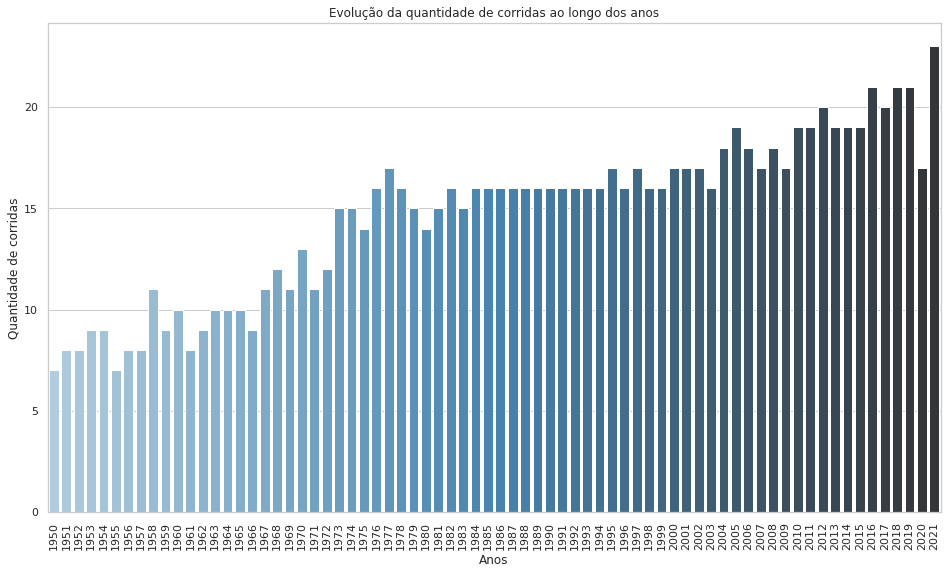

In [31]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=90)
chart = sns.barplot(x = races_per_year["year"], y = races_per_year["raceId"], palette="Blues_d")
chart.set(title="Evolução da quantidade de corridas ao longo dos anos", 
          xlabel="Anos", 
          ylabel="Quantidade de corridas")
plt.show()

In [32]:
# constructors_df

In [33]:
constructors_per_year = rrd[["points", "constructorId"]].groupby([ "constructorId"]).sum().reset_index()

In [34]:
# constructors_per_year

In [35]:
# constructor_results_df.iloc[11799:]
# races_df

In [36]:
rcr_df = pd.merge(constructor_results_df, races_df, on = "raceId")
constructor_points_by_year = rcr_df[["year", "constructorId", "points"]].groupby(["year", "constructorId"]).sum().reset_index()

In [37]:
champions = []
for year in range(1950, 2021):
    data_by_year = constructor_points_by_year[constructor_points_by_year["year"] == year]
    constructor_champion = data_by_year[data_by_year["points"] == data_by_year["points"].max()]
#    print(constructor_champion.values)
    champion_data = constructor_champion[["year", "constructorId", "points"]].values
    if len(champion_data) == 0:
        champions.append([])
    else:
        champions.append(champion_data[0])

In [38]:
constructors_champions_df = pd.DataFrame(data = champions, columns = ["year", "constructorId", "points"]).dropna()
constructors_champions_df[["year", "constructorId"]] = constructors_champions_df[["year", "constructorId"]].astype("int64") 
constructors_champions_df = pd.merge(constructors_champions_df, constructors_df, on = "constructorId")
# constructors_champions_df

# Titulos de construtores ao longo dos anos

Embora não tenha títulos recentes a equipe Ferrari ainda é a maior vencedora da história da Fórmula 1 com 15 títulos.
Williams e McLaren dividem a segunda colocação com 9 títulos cada, além disso nota-se que o domínio das equipes Mercedes e Red Bull visto nos últimos anos é recente, as equipes possuem 7 e 4 títulos respectivamente!

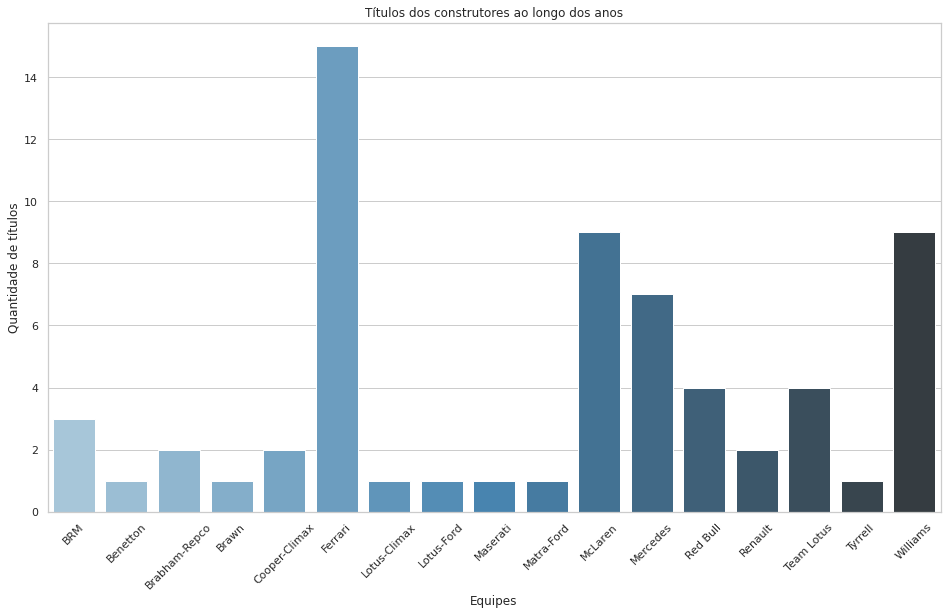

In [39]:
groups = constructors_champions_df.groupby(["name"]).count()
x = groups.index
y = groups["constructorId"]
plt.figure(figsize = (16, 9))
plt.xticks(rotation=45)
chart = sns.barplot(x = x, y = y, palette="Blues_d")
chart.set(title="Títulos dos construtores ao longo dos anos", 
          xlabel="Equipes", 
          ylabel="Quantidade de títulos")

plt.show()